# packages

In [111]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [146]:
x,y=make_regression(n_samples=100,n_features=1,noise=6)
y=y+abs(y/2)

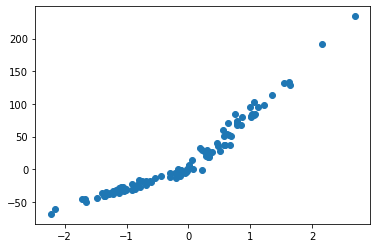

In [147]:
plt.scatter(x,y)

In [148]:
x.shape
y=y.reshape(100,1)

In [149]:
y.shape

(100, 1)

In [220]:
#matrix X
X=np.hstack((x**2,x,np.ones(x.shape)))
#theta
theta=np.random.rand(3,1)

# model

In [221]:
def model(X,theta):
    return X.dot(theta)

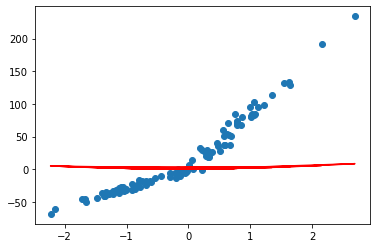

In [222]:
plt.plot(x,model(X,theta),c="r")
plt.scatter(x,y)

# cost function 

In [223]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m) * np.sum((model(X,theta)-y)**2)

In [224]:
cost_function(X,y,theta)

1678.7054441080386

# gradient descent

In [225]:
def grad(X,y,theta):
    m=len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [226]:
grad(X,y,theta)

array([[-28.4181629 ],
       [-50.36062942],
       [-16.85647469]])

In [227]:
def grad_descent(X,y,theta,alpha,iterations):
    cost_history=np.zeros(iterations)
    for i in range(iterations):
        theta=theta - alpha * grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
    return theta,cost_history

# implementation

In [264]:
theta_final,cost_history=grad_descent(X,y,theta,alpha=0.1,iterations=1000)

In [265]:
theta_final

array([[12.45406777],
       [55.79962186],
       [10.42190249]])

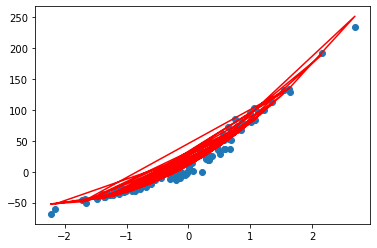

In [266]:
predictions=model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c="r")

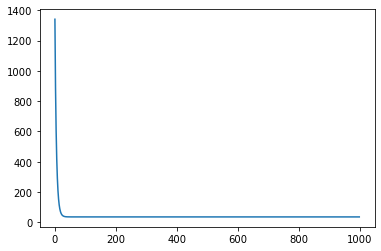

In [267]:
plt.plot(cost_history)


# coef R2 

In [268]:
def R2(y,predictions):
    u=((y-predictions)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1- u/v

In [269]:
R2(y,predictions)

0.9772291654123605